In [ ]:
import numpy as np 
import pandas as pd
path = "/content/weatherHistory.csv"
df = pd.read_csv(path)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.shape

(96453, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
df['Precip Type'].fillna("rain", inplace = True)
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df['Loud Cover'].value_counts()

0.0    96429
Name: Loud Cover, dtype: int64

In [ ]:
y = df['Humidity']
x = df.drop(['Formatted Date','Humidity','Daily Summary','Loud Cover'], axis=1)
x

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,10.5294,20.0,16.1000,1015.95


In [ ]:
x = pd.get_dummies(x, columns=["Summary","Precip Type"])
x.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,14.1197,251.0,15.8263,1015.13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,9.355556,7.227778,14.2646,259.0,15.8263,1015.63,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,9.377778,3.9284,204.0,14.9569,1015.94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.288889,5.944444,14.1036,269.0,15.8263,1016.41,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8.755556,6.977778,11.0446,259.0,15.8263,1016.51,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x=x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
x_train = x[0:67500]
x_test = x[67500:]

y= np.array((y-y.mean())/y.std())
y_train = y[0:67500]
y_test = y[67500:]

In [ ]:
import math

def hypothesis(b,X, W):
    return  b + np.dot(X, W)

def gradient(X, y, W,h):
    grad = np.dot(X.transpose(), (h - y))
    return grad

#learning rate = 0.001
def update_weights(Weight,x,y,b):
  for i in range(len(Weight)):
     h = b + np.dot(x,Weight[i])
     Weight[i] = Weight[i] - 0.001 * gradient(x, y, Weight[i],h)
  return Weight
def MSE(Y_true,Y_pred):
 error = np.square(np.subtract(Y_true,Y_pred)).mean()
 return error


In [ ]:
# multi_layer
W1 = np.random.rand(10, 35) 
b1 = np.random.rand(10, 1) 
W2 = np.random.rand(10, 1) 
b2 = np.random.rand()


mean_squared_error = []
inputs_of_hidden_layer = np.zeros((10,10))

for j in range(10):
  for i in range(10):
    xp = b1[i]+ np.dot(x_train[0:10],W1[i])
    W1[i] = update_weights(W1[i],xp,y_train[0:10],b1[i])
    inputs_of_hidden_layer[i] = xp
  
  
  y_predicted = b2+ np.dot(inputs_of_hidden_layer,W2)
  W2 = update_weights(W2,y_predicted,y_train[0:10],b2)
  mean_squared_error.append(MSE(y_test[0:10],y_predicted))


Text(0, 0.5, 'Mean Squared Error')

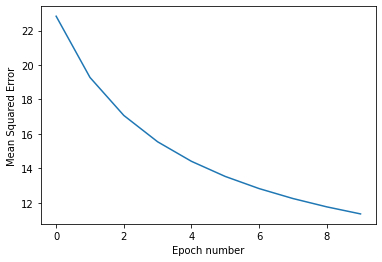

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mean_squared_error)
plt.xlabel('Epoch number')
plt.ylabel('Mean Squared Error')